# TRAVELLING SALESMAN PROBLEM

In [250]:
import rasterio
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tsp
from shapely.geometry import Point, LineString
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import ConvexHull
from scipy.spatial.qhull import QhullError
from itertools import permutations


C:\Users\640 g1\AppData\Local\Temp\ipykernel_16344\1619314870.py:11: DeprecationWarning: Please use `QhullError` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import QhullError


#Data sources will be linked

In [88]:

kiambu=gpd.read_file('C:/SCHOOL/2024/DATA/GIS_data/Kiambu/vector')
rds=gpd.read_file('C:/SCHOOL/2024/DATA/GIS_data/sample_data/roads')
kenya=gpd.read_file('C:/SCHOOL/2024/DATA/GIS_data/sample_data/kenya')
# kenya=gpd.read_file('C:/SCHOOL/2024/DATA/GIS_data/kenya/KEN_adm')

In [89]:
print(kiambu.crs)
print(rds.crs)
print(kenya.crs)

EPSG:32737
EPSG:4326
EPSG:4326


##Ensure the geometries have the same coordinate refernce system

In [90]:
kiambu=kiambu.to_crs('EPSG:4326')

In [91]:
print(kiambu.geometry.is_valid)

0    True
dtype: bool
45    True
dtype: bool


In [92]:
nairobi=kenya[kenya['DISTNAME']=='NAIROBI']

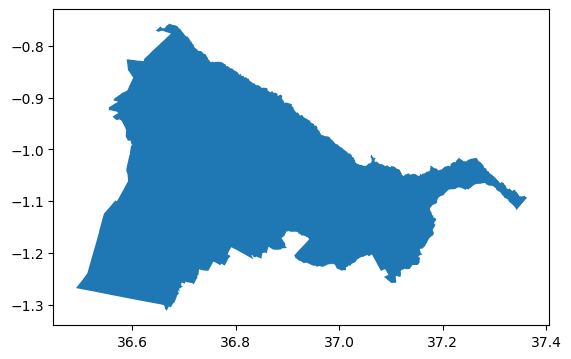

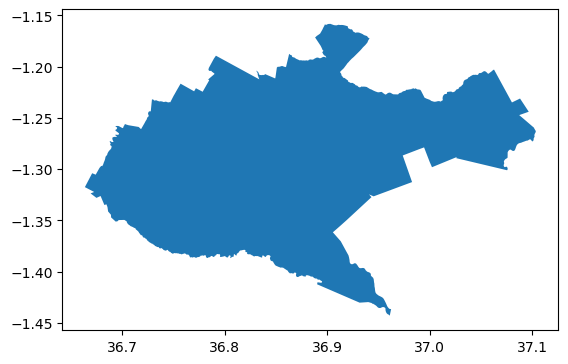

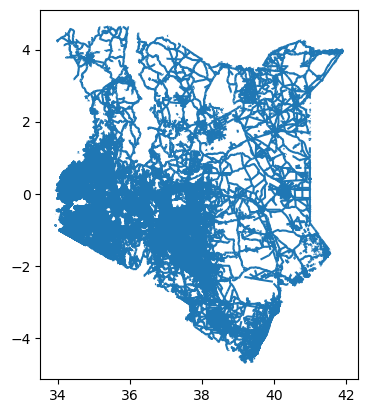

In [93]:
kiambu.plot()
nairobi.plot()
# kenya.plot()
rds.plot()
plt.show()

##If the geodataframes intersect use the overlay's 'union' to linkt the two

In [117]:
intersect=gpd.overlay(kiambu,nairobi,how='union')
#selected only the primary, seconday and tertiary roads networks
highways=rds[(rds['highway']=='primary')|(rds['highway']=='secondary')|(rds['highway']=='tertiary')]
highways


,osm_id,layer,name,bridge,smoothness,source,width,lanes,oneway,highway,surface,geometry
0,4.685092e+06,0,None,None,None,None,None,None,yes,secondary,None,"LINESTRING (36.91442 -1.34465, 36.91427 -1.344..."
1,4.716859e+06,None,None,None,None,None,None,None,yes,tertiary,asphalt,"LINESTRING (36.77944 -1.30009, 36.77943 -1.29994)"
2,4.716860e+06,None,State House Avenue,None,None,None,None,None,None,tertiary,asphalt,"LINESTRING (36.80434 -1.28648, 36.80449 -1.286..."
3,4.716861e+06,None,Processional Way,None,None,None,None,None,None,tertiary,asphalt,"LINESTRING (36.81358 -1.28721, 36.81397 -1.287..."
4,4.716862e+06,None,Kenyatta Avenue,None,None,None,None,None,yes,secondary,asphalt,"LINESTRING (36.81026 -1.28950, 36.81034 -1.289..."
...,...,...,...,...,...,...,...,...,...,...,...,...
580904,1.016033e+09,None,Kivani Road,None,None,None,None,None,None,tertiary,None,"LINESTRING (37.37401 -1.44083, 37.37407 -1.440..."
580907,1.016041e+09,None,Katumani - Konza Road,None,None,Africover,None,None,yes,secondary,None,"LINESTRING (37.23931 -1.58715, 37.23923 -1.587..."
580908,1.016041e+09,None,Katumani - Konza Road,None,None,Africover,None,None,yes,secondary,None,"LINESTRING (37.23893 -1.58756, 37.23899 -1.587..."
580911,1.016041e+09,None,Katumani - Konza Road,None,None,Africover,None,None,yes,secondary,None,"LINESTRING (37.19117 -1.65064, 37.19130 -1.650..."


C:\Users\640 g1\AppData\Local\Temp\ipykernel_16344\3507156601.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


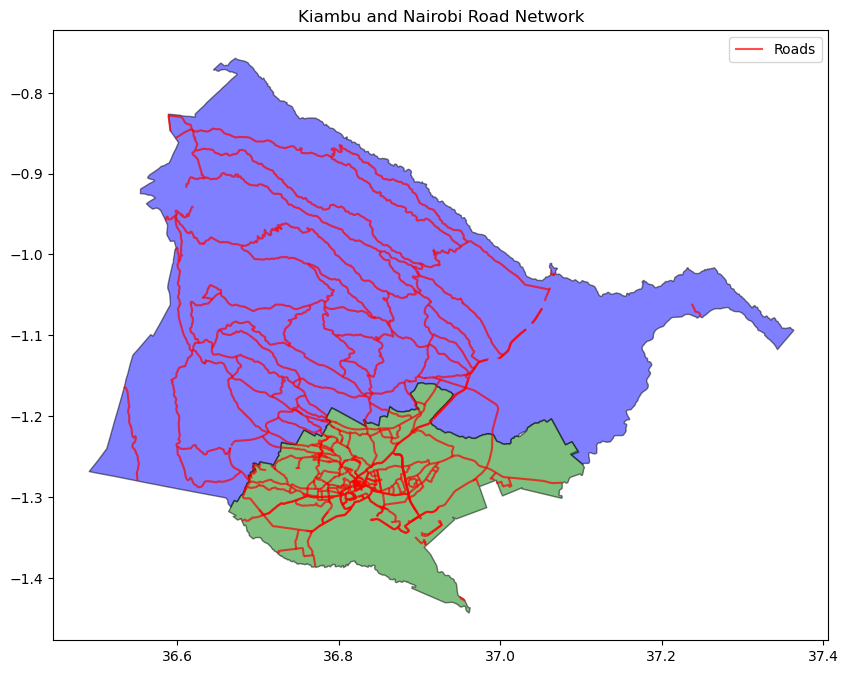

In [118]:
#clliped the roads data to the intersect(kiambu+nairobi) polygons
clipped_roads = gpd.clip(highways, intersect)
fig, ax = plt.subplots(figsize=(10, 10))
kiambu.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='Kiambu')
nairobi.plot(ax=ax, color='green', alpha=0.5, edgecolor='k', label='Nairobi')

clipped_roads.plot(ax=ax, color='red', alpha=0.7, edgecolor='k', label='Roads')

# Add legend
ax.legend()

plt.title('Kiambu and Nairobi Road Network')
plt.show()

##Determining the length of the raoads in each county.EPSG:32626 is a projected coordinate system used for engineering survey and topographic mapping. It is based on the World Geodetic System 1984 and uses the Transverse Mercator projection. The system is used in the area between 30°W and 24°W, northern hemisphere between equator and 84°N, onshore and offshore. The unit of measurement is meters 1.

In [157]:
#length
roads=rds.to_crs(epsg=32636)
kiambu_roads=gpd.clip(kiambu,roads)
kiambu_roads_meters = kiambu_roads.to_crs(epsg=32636)
kiambu_roads_length_meters = kiambu_roads_meters['geometry'].length.sum()

print(f'Length in kilometres: {kiambu_roads_length_meters / 1000} km')

Length in kilometres: 10365.542592021113 km


In [159]:
#Area
kiambu=kiambu.to_crs(epsg=32636)
kiambu_area = kiambu['geometry'].area.iloc[0]
print(f'Area in square kilometers: {kiambu_area / 1e6} km²')


Area in square kilometers: 2552.382579302138 km²


##Percentage of area covered by roads. the buffer tool splits the road network into 3 metres from the centre line and uses this to calculate area of the roads.

In [184]:
kiambu_roads_meters
kbuffer=kiambu_roads_meters['geometry'].buffer(3)
mbuffer=kbuffer.unary_union
mbuffer_gdf=gpd.GeoDataFrame(geometry=[mbuffer])
kra=mbuffer_gdf['geometry'].area.sum()
percentage_area_covered = (kra / kiambu_area )* 100
print(f'Percentage of area covered by roads in Kiambu:{percentage_area_covered} %')

Percentage of area covered by roads in Kiambu:2.413505864158576 %


In [187]:
#length
nairobi=nairobi.to_crs(epsg=32636)
nairobi_roads=gpd.clip(roads,nairobi)
nairobi_roads_metres=nairobi_roads['geometry'].length.sum()
print(f'length of nairobi roads:{nairobi_roads_metres/1000} km')

length of nairobi roads:7354.829026527013 km


In [165]:
#area
nairobi_area=nairobi['geometry'].area.iloc[0]
print(f'Area in square kilometers: {nairobi_area / 1e6} km²')


Area in square kilometers: 697.9679699373647 km²


In [190]:
nroads=nairobi_roads['geometry'].buffer(3)
mroads=nroads.unary_union
mroads_gdf=gpd.GeoDataFrame(geometry=[mroads])
nra=mroads_gdf['geometry'].area.sum()
area_covered= nra/nairobi_area *100
print(f'percentage of roads covering nairobi area:{area_covered} %')

percentage of roads covering nairobi area:6.208701078129484 %


## created a geodataframe for location various malls 

In [195]:
malls = {'Latitude': [-1.136319, -1.117576, -1.165018,-1.210915,-1.232481,-1.219641,-1.225256,-1.329766,-1.298246,-1.312832],
                      'Longitude': [36.9700, 37.0089, 36.824323,36.795016,36.878816,36.888267,36.839899,36.714658,36.762538,36.8168834],
               'Label': ['spur', 'JCM', 'Kiambu_mall','Two rivers','Garden city','TRM','Ridgeways','Waterfront','JunctionMall','Tmall']}

# Create a GeoDataFrame with Point geometries and labels
geometry = [Point(lon, lat) for lon, lat in zip(malls['Longitude'], malls['Latitude'])]
points_gdf = gpd.GeoDataFrame(malls, geometry=geometry, crs='EPSG:4326')
# Display the GeoDataFrame
print(points_gdf)

   Latitude  Longitude         Label               geometry
0 -1.136319  36.970000          spur  POINT (36.970 -1.136)
1 -1.117576  37.008900           JCM  POINT (37.009 -1.118)
2 -1.165018  36.824323   Kiambu_mall  POINT (36.824 -1.165)
3 -1.210915  36.795016    Two rivers  POINT (36.795 -1.211)
4 -1.232481  36.878816   Garden city  POINT (36.879 -1.232)
5 -1.219641  36.888267           TRM  POINT (36.888 -1.220)
6 -1.225256  36.839899     Ridgeways  POINT (36.840 -1.225)
7 -1.329766  36.714658    Waterfront  POINT (36.715 -1.330)
8 -1.298246  36.762538  JunctionMall  POINT (36.763 -1.298)
9 -1.312832  36.816883         Tmall  POINT (36.817 -1.313)


In [215]:
intersect=intersect.to_crs('epsg:4326')
kiambu=kiambu.to_crs('epsg:4326')
nairobi=nairobi.to_crs('epsg:4326')

C:\Users\640 g1\AppData\Local\Temp\ipykernel_16344\3732737934.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


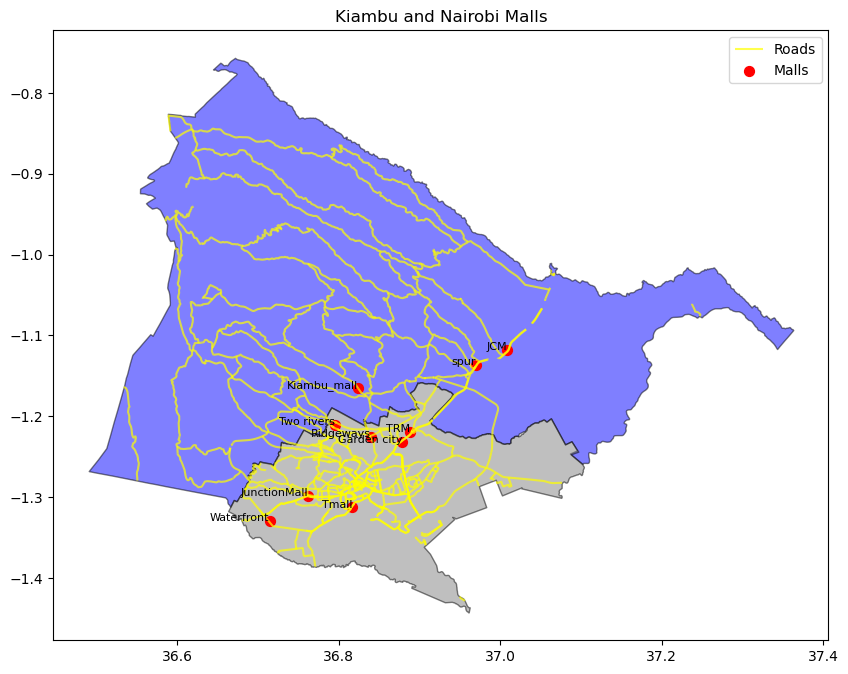

In [219]:
#visualizing the malls on the map
fig, ax = plt.subplots(figsize=(10, 10))
kiambu.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='Kiambu')
nairobi.plot(ax=ax, color='grey', alpha=0.5, edgecolor='k', label='Nairobi')
clipped_roads.plot(ax=ax, color='yellow', alpha=0.7, edgecolor='k', label='Roads')
points_gdf.plot(ax=ax, color='red', markersize=50, label='Malls')

for x, y, label in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf['Label']):
    ax.text(x, y, label, fontsize=8, ha='right')

ax.legend()
plt.title('Kiambu and Nairobi Malls')
plt.show()



# # Solving the TSP 

Optimal Order of Points: ['JCM', 'spur', 'TRM', 'Garden city', 'Ridgeways', 'Kiambu_mall', 'Two rivers', 'Tmall', 'JunctionMall', 'Waterfront']
Minimum Distance: 0.5499261196797413


C:\Users\640 g1\AppData\Local\Temp\ipykernel_16344\3780075639.py:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


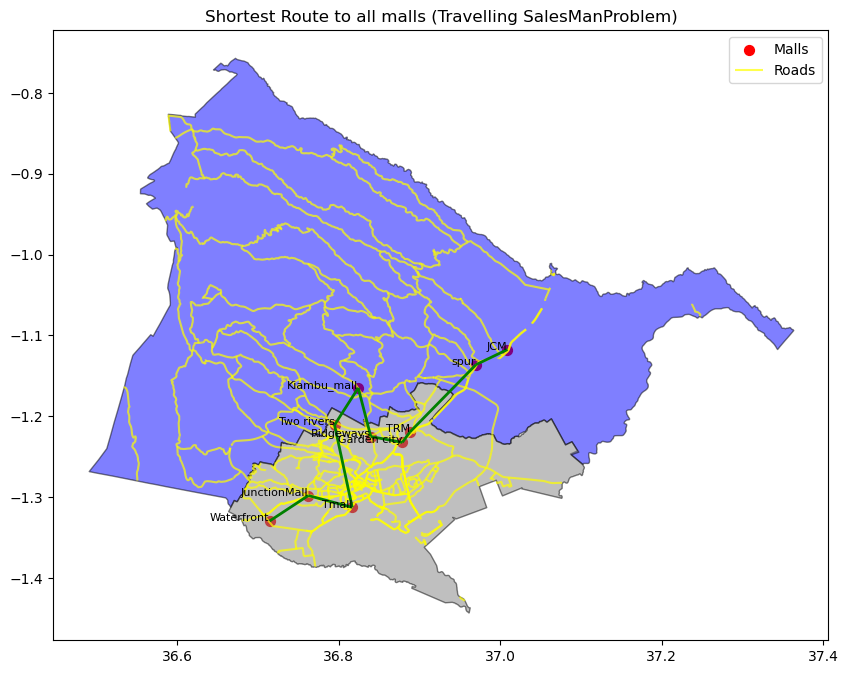

In [253]:

# Extracting coordinates as a 2D array
coords_array = np.array([(point.x, point.y) for point in points_gdf['geometry']])

# # Creating a distance matrix
dist_matrix = squareform(pdist(coords_array))
# Find the optimal route using brute-force permutation
min_distance = float('inf')
optimal_route = None
for perm in permutations(range(len(points_gdf))):
    distance = np.sum(dist_matrix[perm[:-1], perm[1:]])
    if distance < min_distance:
        min_distance = distance
        optimal_route = perm

# Rearrange the points in the optimal order
optimal_order = [points_gdf.iloc[i] for i in optimal_route]

# Print the optimal order and minimum distance
print("Optimal Order of Points:", [point['Label'] for point in optimal_order])
print("Minimum Distance:", min_distance)
# Plot the points and the optimal route
fig, ax = plt.subplots(figsize=(10, 10))
points_gdf.plot(ax=ax, color='red', markersize=50, label='Malls')
kiambu.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='Kiambu')
nairobi.plot(ax=ax, color='grey', alpha=0.5, edgecolor='k', label='Nairobi')
clipped_roads.plot(ax=ax, color='yellow', alpha=0.7, edgecolor='k', label='Roads')
# Connect the points with lines to represent the route
route_line = gpd.GeoDataFrame(geometry=[LineString([points_gdf.geometry.iloc[i], points_gdf.geometry.iloc[j]]) for i, j in zip(optimal_route[:-1], optimal_route[1:])])
route_line.plot(ax=ax, color='green', linewidth=2)

# Add labels to the points
for x, y, label in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf['Label']):
    ax.text(x, y, label, fontsize=8, ha='right')

plt.legend()
plt.title('Shortest Route to all malls (Travelling SalesManProblem)')
plt.show()